# Fig 4b | Illustration of multi-scale resolution enhancement experiment.

In [1]:
import numpy as np
import pandas as pd

scale_series = [2, 3, 4, 5, 6]

folder_name = 'slide_seq_dna_rna_series'
scale = 2

['PC1', 'PC2', 'Hmga2', 'Tm4sf1', 'Aqp5']


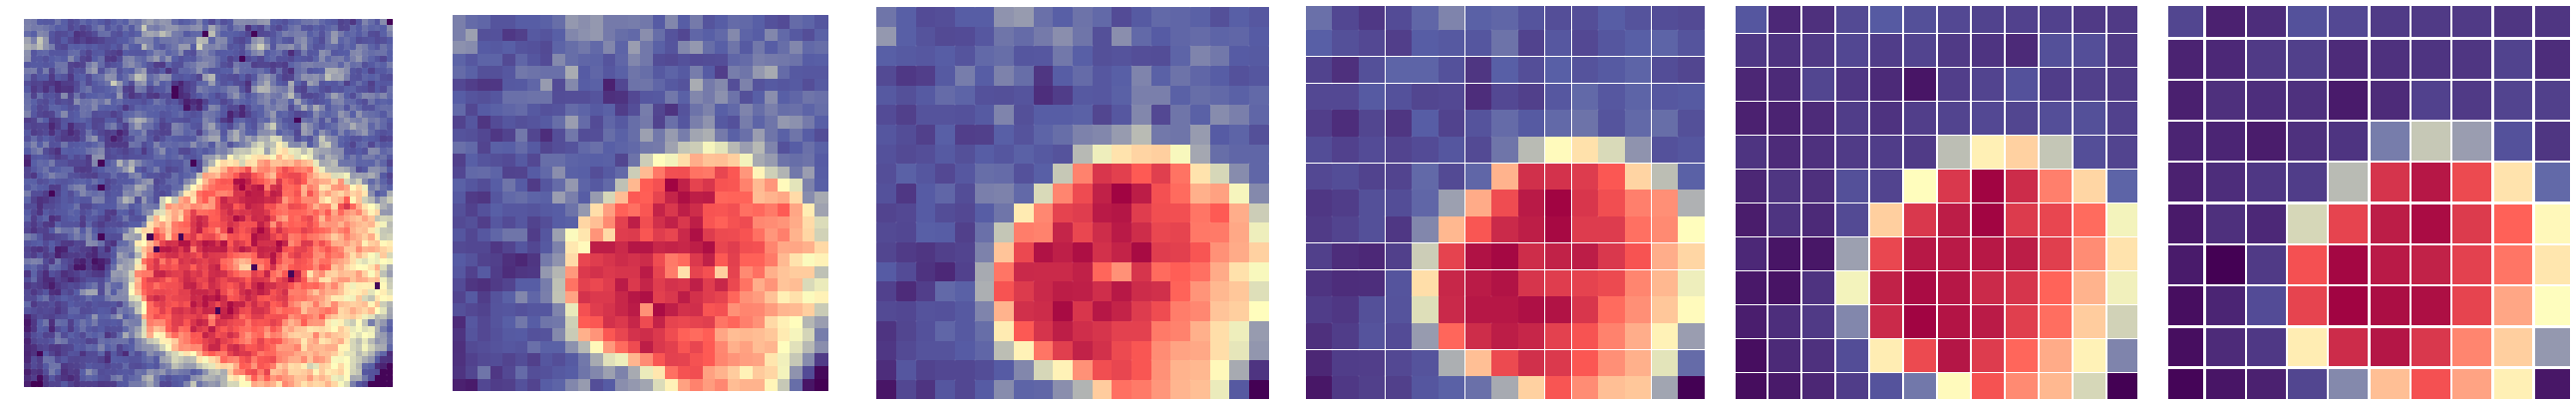

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
genes = pd.read_csv(f'result/{folder_name}/x2/rowData.csv')['Gene'].tolist()
print(genes)

# cmp = 'plasma'
def min_max_norm(array):
    return (array - np.min(array))/(np.max(array) - np.min(array))

# def min_max_norm_t(array, min_=0.1, max_=0.9):
#     norm_array = min_max_norm(np.argsort(np.argsort(array)))
#     return norm_array


from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist=['#440154', '#575ea6','#fffebe', '#ff5b54', '#a10442']
cmp = LinearSegmentedColormap.from_list('chaos',clist)
# cmp = 'turbo'
size = 30
f, axs = plt.subplots(nrows=1, ncols=6, figsize=(36, 6))

row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

plt.axis("equal")
axs[0].scatter(row, col, s=size, marker='s', c=min_max_norm(data[genes[0]].values), cmap=cmp)
plt.tight_layout()
axs[0].axis('off')
axs[0].axis("equal")

for s in scale_series:
    project_name = f'{folder_name}/x{s}'
    data_control = pd.read_csv(f'result/{folder_name}/x{s}/count_merge.csv')
    position_merge = pd.read_csv(f'result/{folder_name}/x{s}/colData_merge.csv')
    
    row_merge = position_merge['col']*s
    col_merge = position_merge['row']*s
    
    axs[s-1].axis("equal")
    axs[s-1].scatter(row_merge, col_merge, s=40*s*s, marker='s', 
                     c=min_max_norm(data_control[genes[0]].values), cmap=cmp)
    plt.tight_layout()
    axs[s-1].axis('off')

plt.savefig(f'../paper/NNfig/Fig4/scale_compare_PC1.pdf')
plt.show()

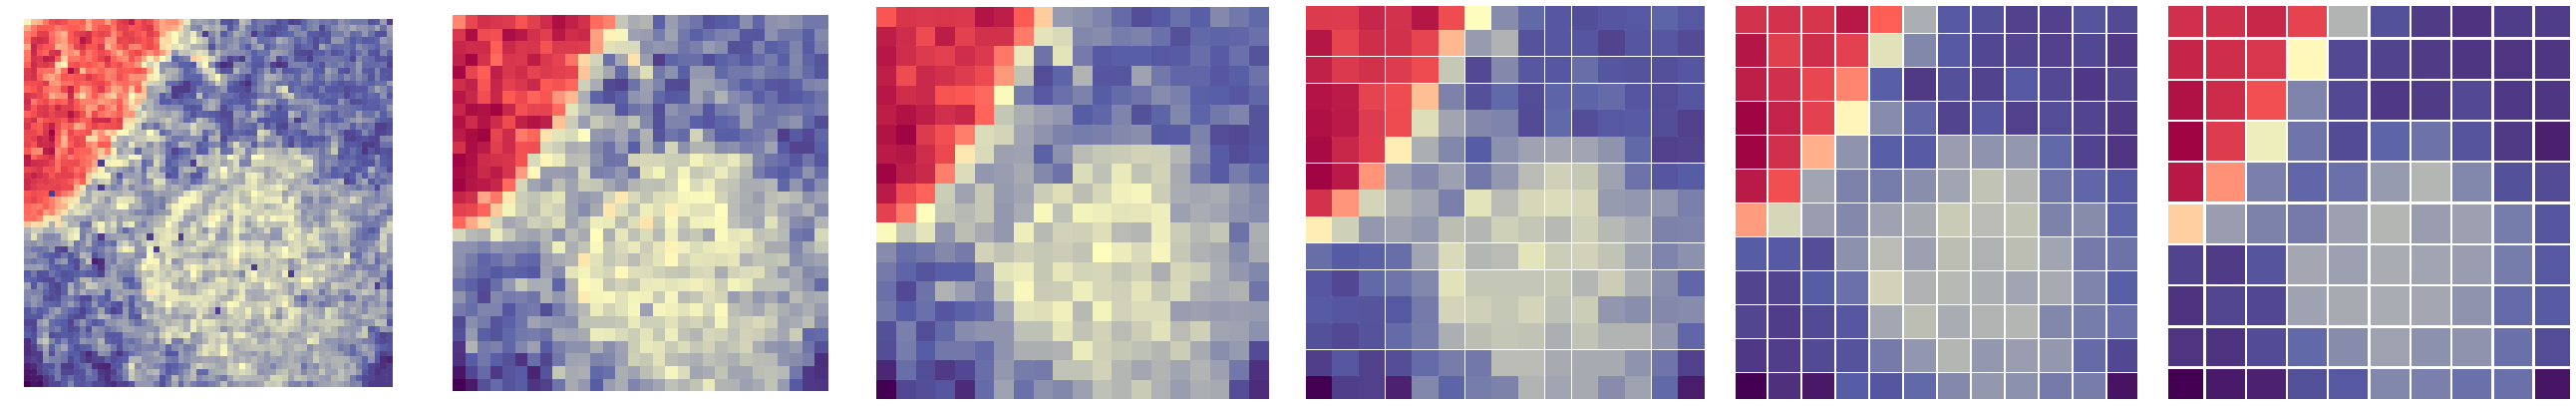

In [3]:
size = 30
f, axs = plt.subplots(nrows=1, ncols=6, figsize=(36, 6))

row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

plt.axis("equal")
axs[0].scatter(row, col, s=size, marker='s', c=min_max_norm(data[genes[1]].values), cmap=cmp)
plt.tight_layout()
axs[0].axis('off')
axs[0].axis("equal")

for s in scale_series:
    project_name = f'{folder_name}/x{s}'
    data_control = pd.read_csv(f'result/{folder_name}/x{s}/count_merge.csv')
    position_merge = pd.read_csv(f'result/{folder_name}/x{s}/colData_merge.csv')
    
    row_merge = position_merge['col']*s
    col_merge = position_merge['row']*s
    
    axs[s-1].axis("equal")
    axs[s-1].scatter(row_merge, col_merge, s=40*s*s, marker='s', 
                     c=min_max_norm(data_control[genes[1]].values), cmap=cmp)
    plt.tight_layout()
    axs[s-1].axis('off')

plt.savefig(f'../paper/NNfig/Fig4/scale_compare_PC2.pdf')
plt.show()

# Fig 4c | Comparison of enhancement approaches to enhance top 2 DNA PCs from low-resolution profiles at different scales

In [4]:
from postprocess import Numpy2Image as n2i
from postprocess import Result2Csv as r2c
import numpy as np
import pandas as pd

# exp_group = 2
exp_group = 1
for s in scale_series:
    scale = s
    project_name = f'{folder_name}/x{scale}'
    # exp_name = f'svae_slide_dnx{scale}_g{exp_group}_n'
    exp_name = f'svae_slide_dnx{scale}_nn{exp_group}_n'

    feature_name = ['PC1', 'PC2']

    grid = scale**2

    fea = np.load(f'result/{folder_name}/{exp_name}/infer_subspot.npy')[:, :2]
    mean_fea = np.zeros((fea.shape[0]//grid, fea.shape[1]))
    spot_num = fea.shape[0]//grid
    for i in range(spot_num):
        fea_sub = fea[i * grid :(i + 1) * grid]
        mean_fea[i] = np.mean(fea_sub, axis=0)

    df = pd.DataFrame(fea, columns=feature_name)
    df.to_csv(f'result/{folder_name}/norm/DNA/x{s}/ours.csv', index=None)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib



from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
cmp = LinearSegmentedColormap.from_list('chaos',clist)

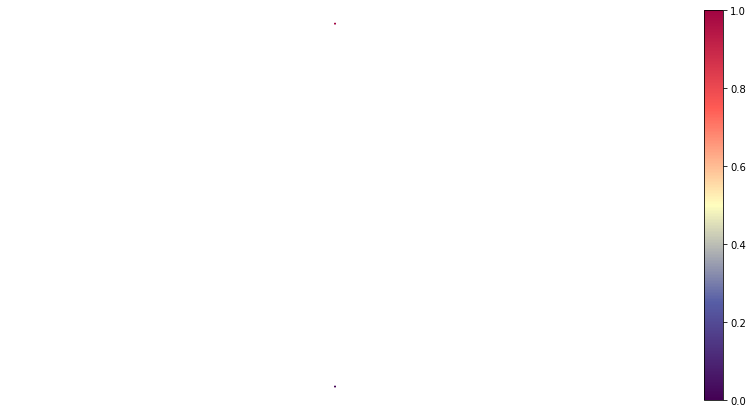

In [6]:
f_, ax_ = plt.subplots(figsize=(12, 6))
plt.axis("equal")
img_00 = plt.scatter([0, 0],[0, 1], s=1,
                    marker='o',
                    c=[0, 1], cmap=cmp, vmin=0, vmax=1)

f_.colorbar(img_00)
plt.tight_layout()
plt.axis('off') 
plt.savefig(f'../paper/NNfig/Fig4/colorbar.pdf')
plt.show()

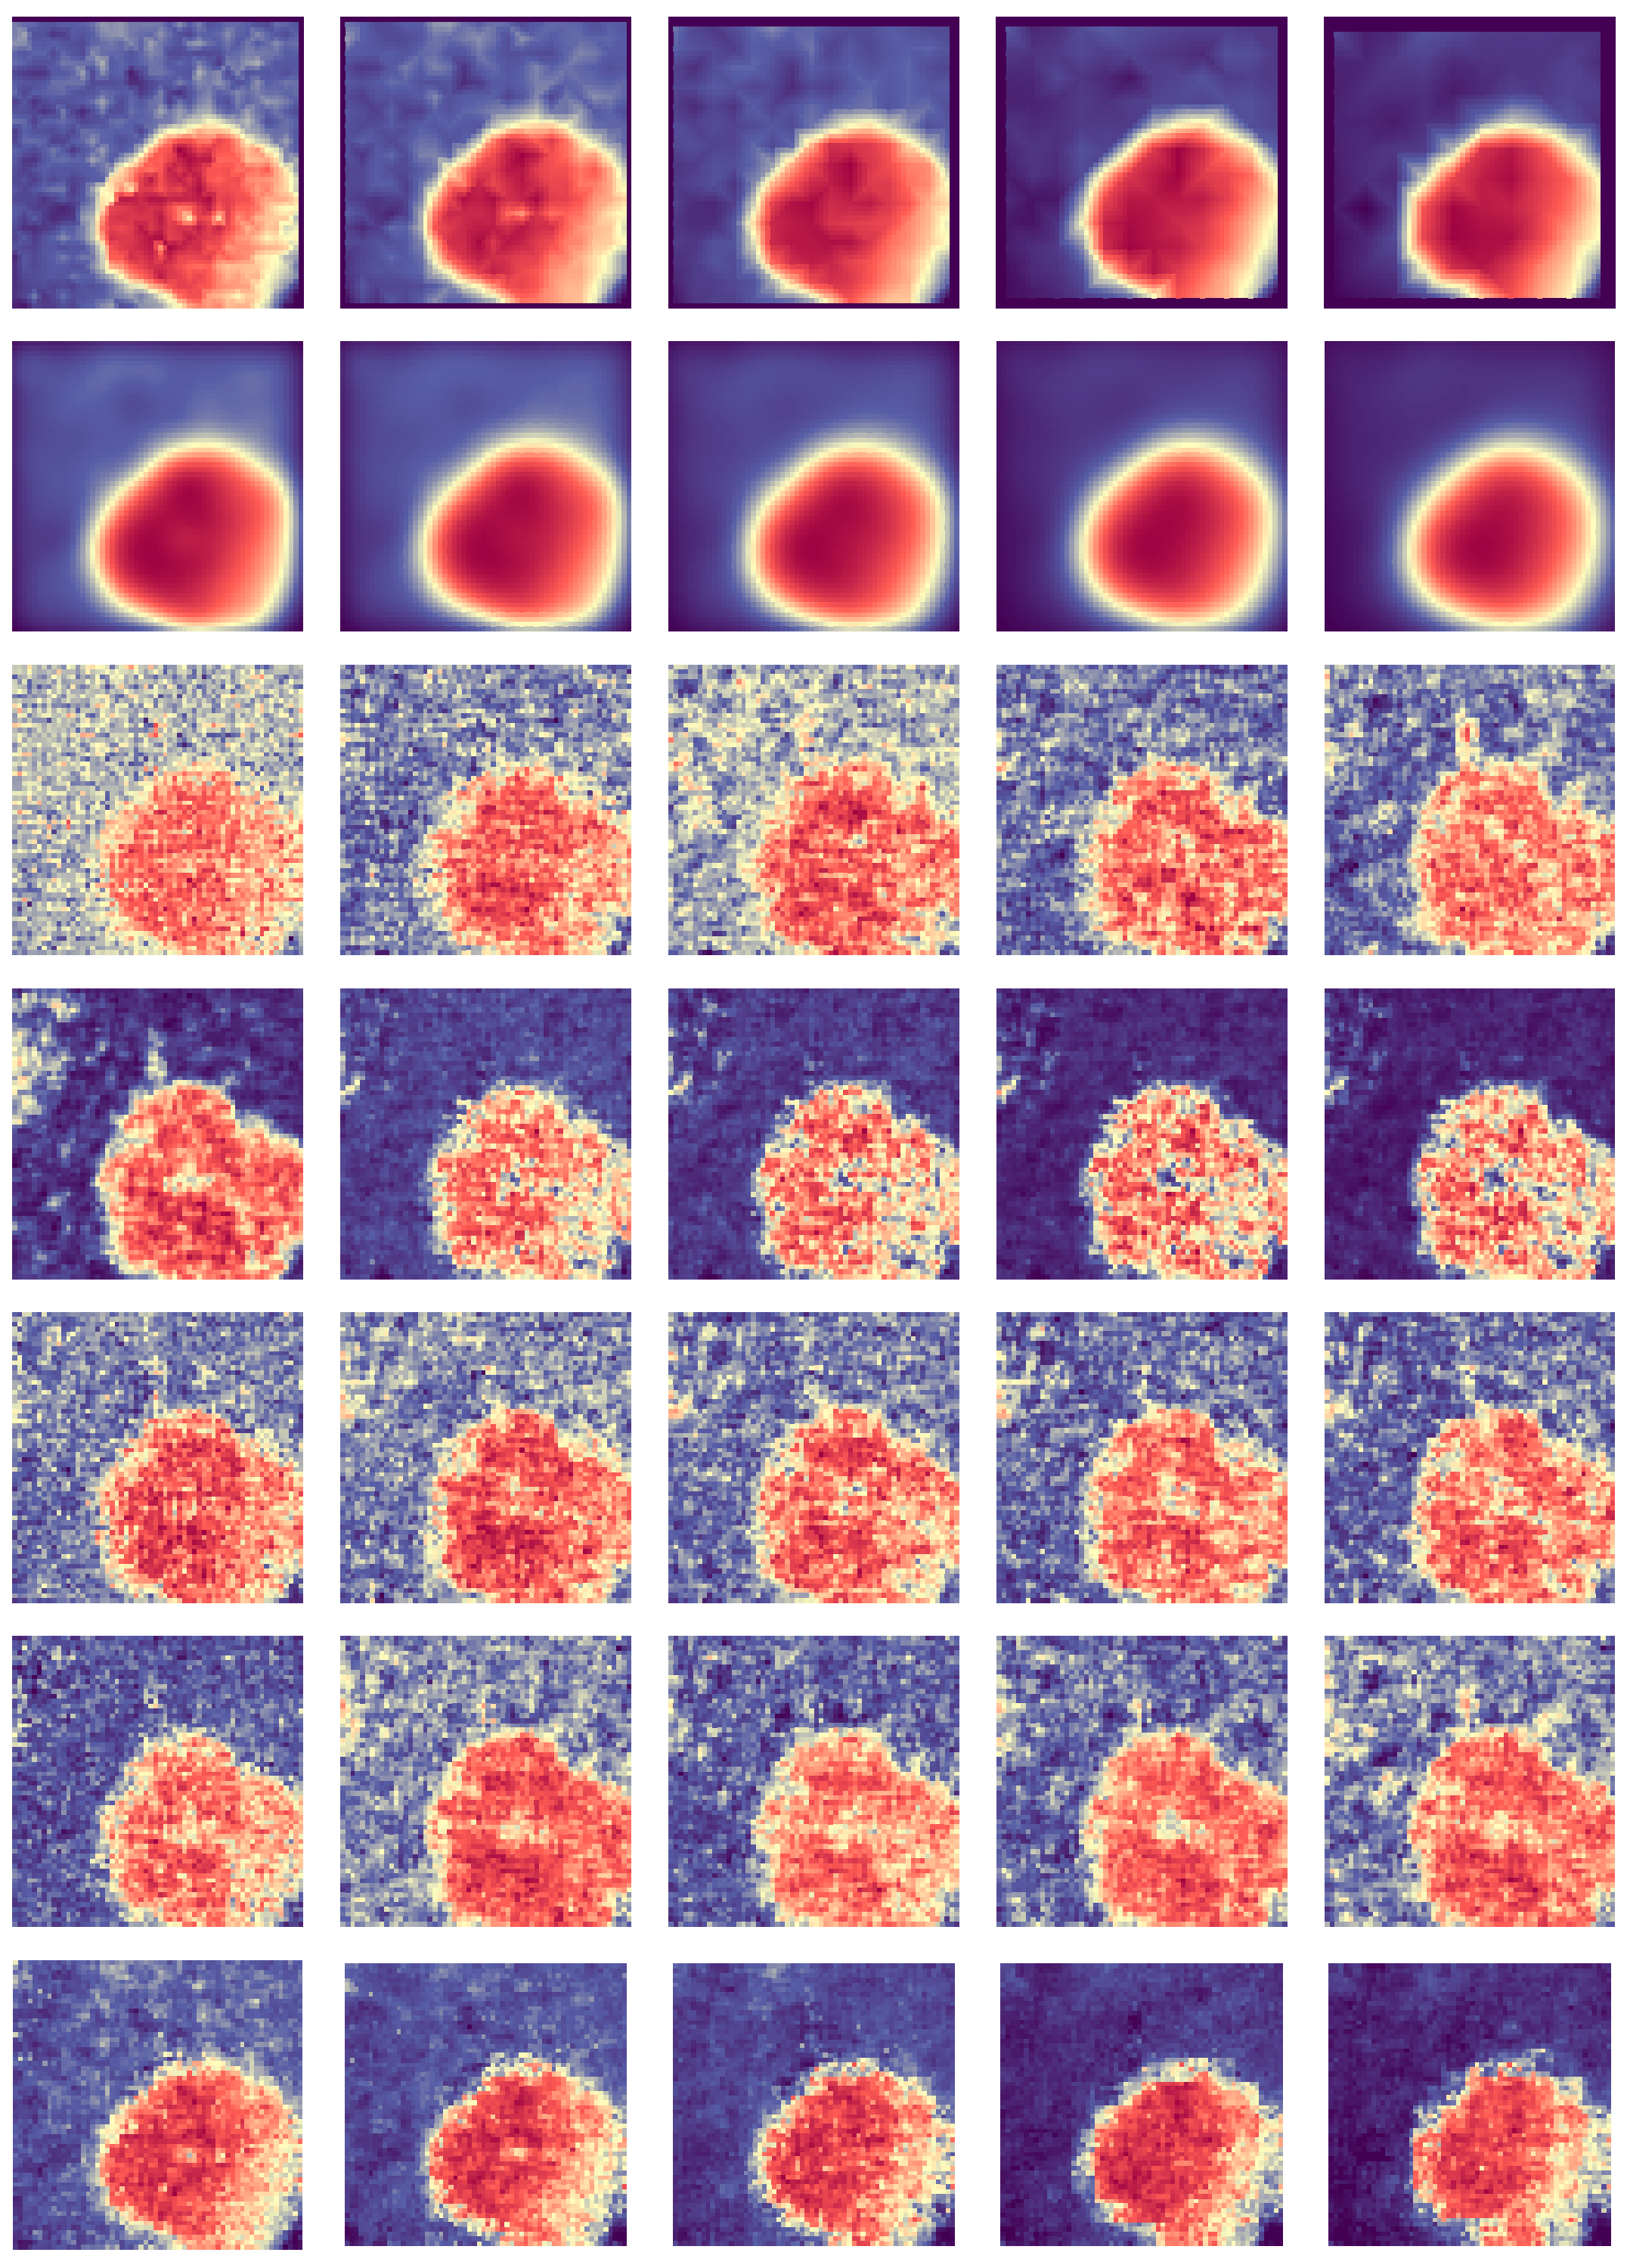

In [7]:
f, axs = plt.subplots(nrows=7, ncols=5, figsize=(30, 42))
size_ = 30
data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())
data_name = ['interpolation_linear', 'gp_4', 'g2p_lrm', 'g2p_gp', 'g2p_mlp_128', 'joint_mlp_128', 'ours']
# ['interpolation_linear', 'gp_3', 'g2p_lrm', 'g2p_gp', 'g2p_mlp_128', 'ours']


plt.axis("equal")

size_ = 49
plt.axis("equal")
for i in range(len(data_name)):
    name = data_name[i]
    for s in scale_series:
        project_name = f'{folder_name}/norm/DNA/x{s}'
        position_r = pd.read_csv(f'result/{folder_name}/x{s}/reordered_position_with_center.csv')
        row_r = position_r['col']
        col_r = position_r['row']
        data_ours = pd.read_csv(f'result/{project_name}/{name}.csv')
        position_merge = pd.read_csv(f'result/{folder_name}/x{s}/colData_merge.csv')
        axs[i, s-2].axis("equal")
        axs[i, s-2].scatter(row_r, col_r, s=size_, marker='s', 
                         c=min_max_norm(data_ours['PC1'].values), cmap=cmp, linewidth=0)
        plt.tight_layout()
        axs[i, s-2].axis('off')

plt.savefig(f'../paper/NNfig/Fig4/PC1.png')
plt.show()

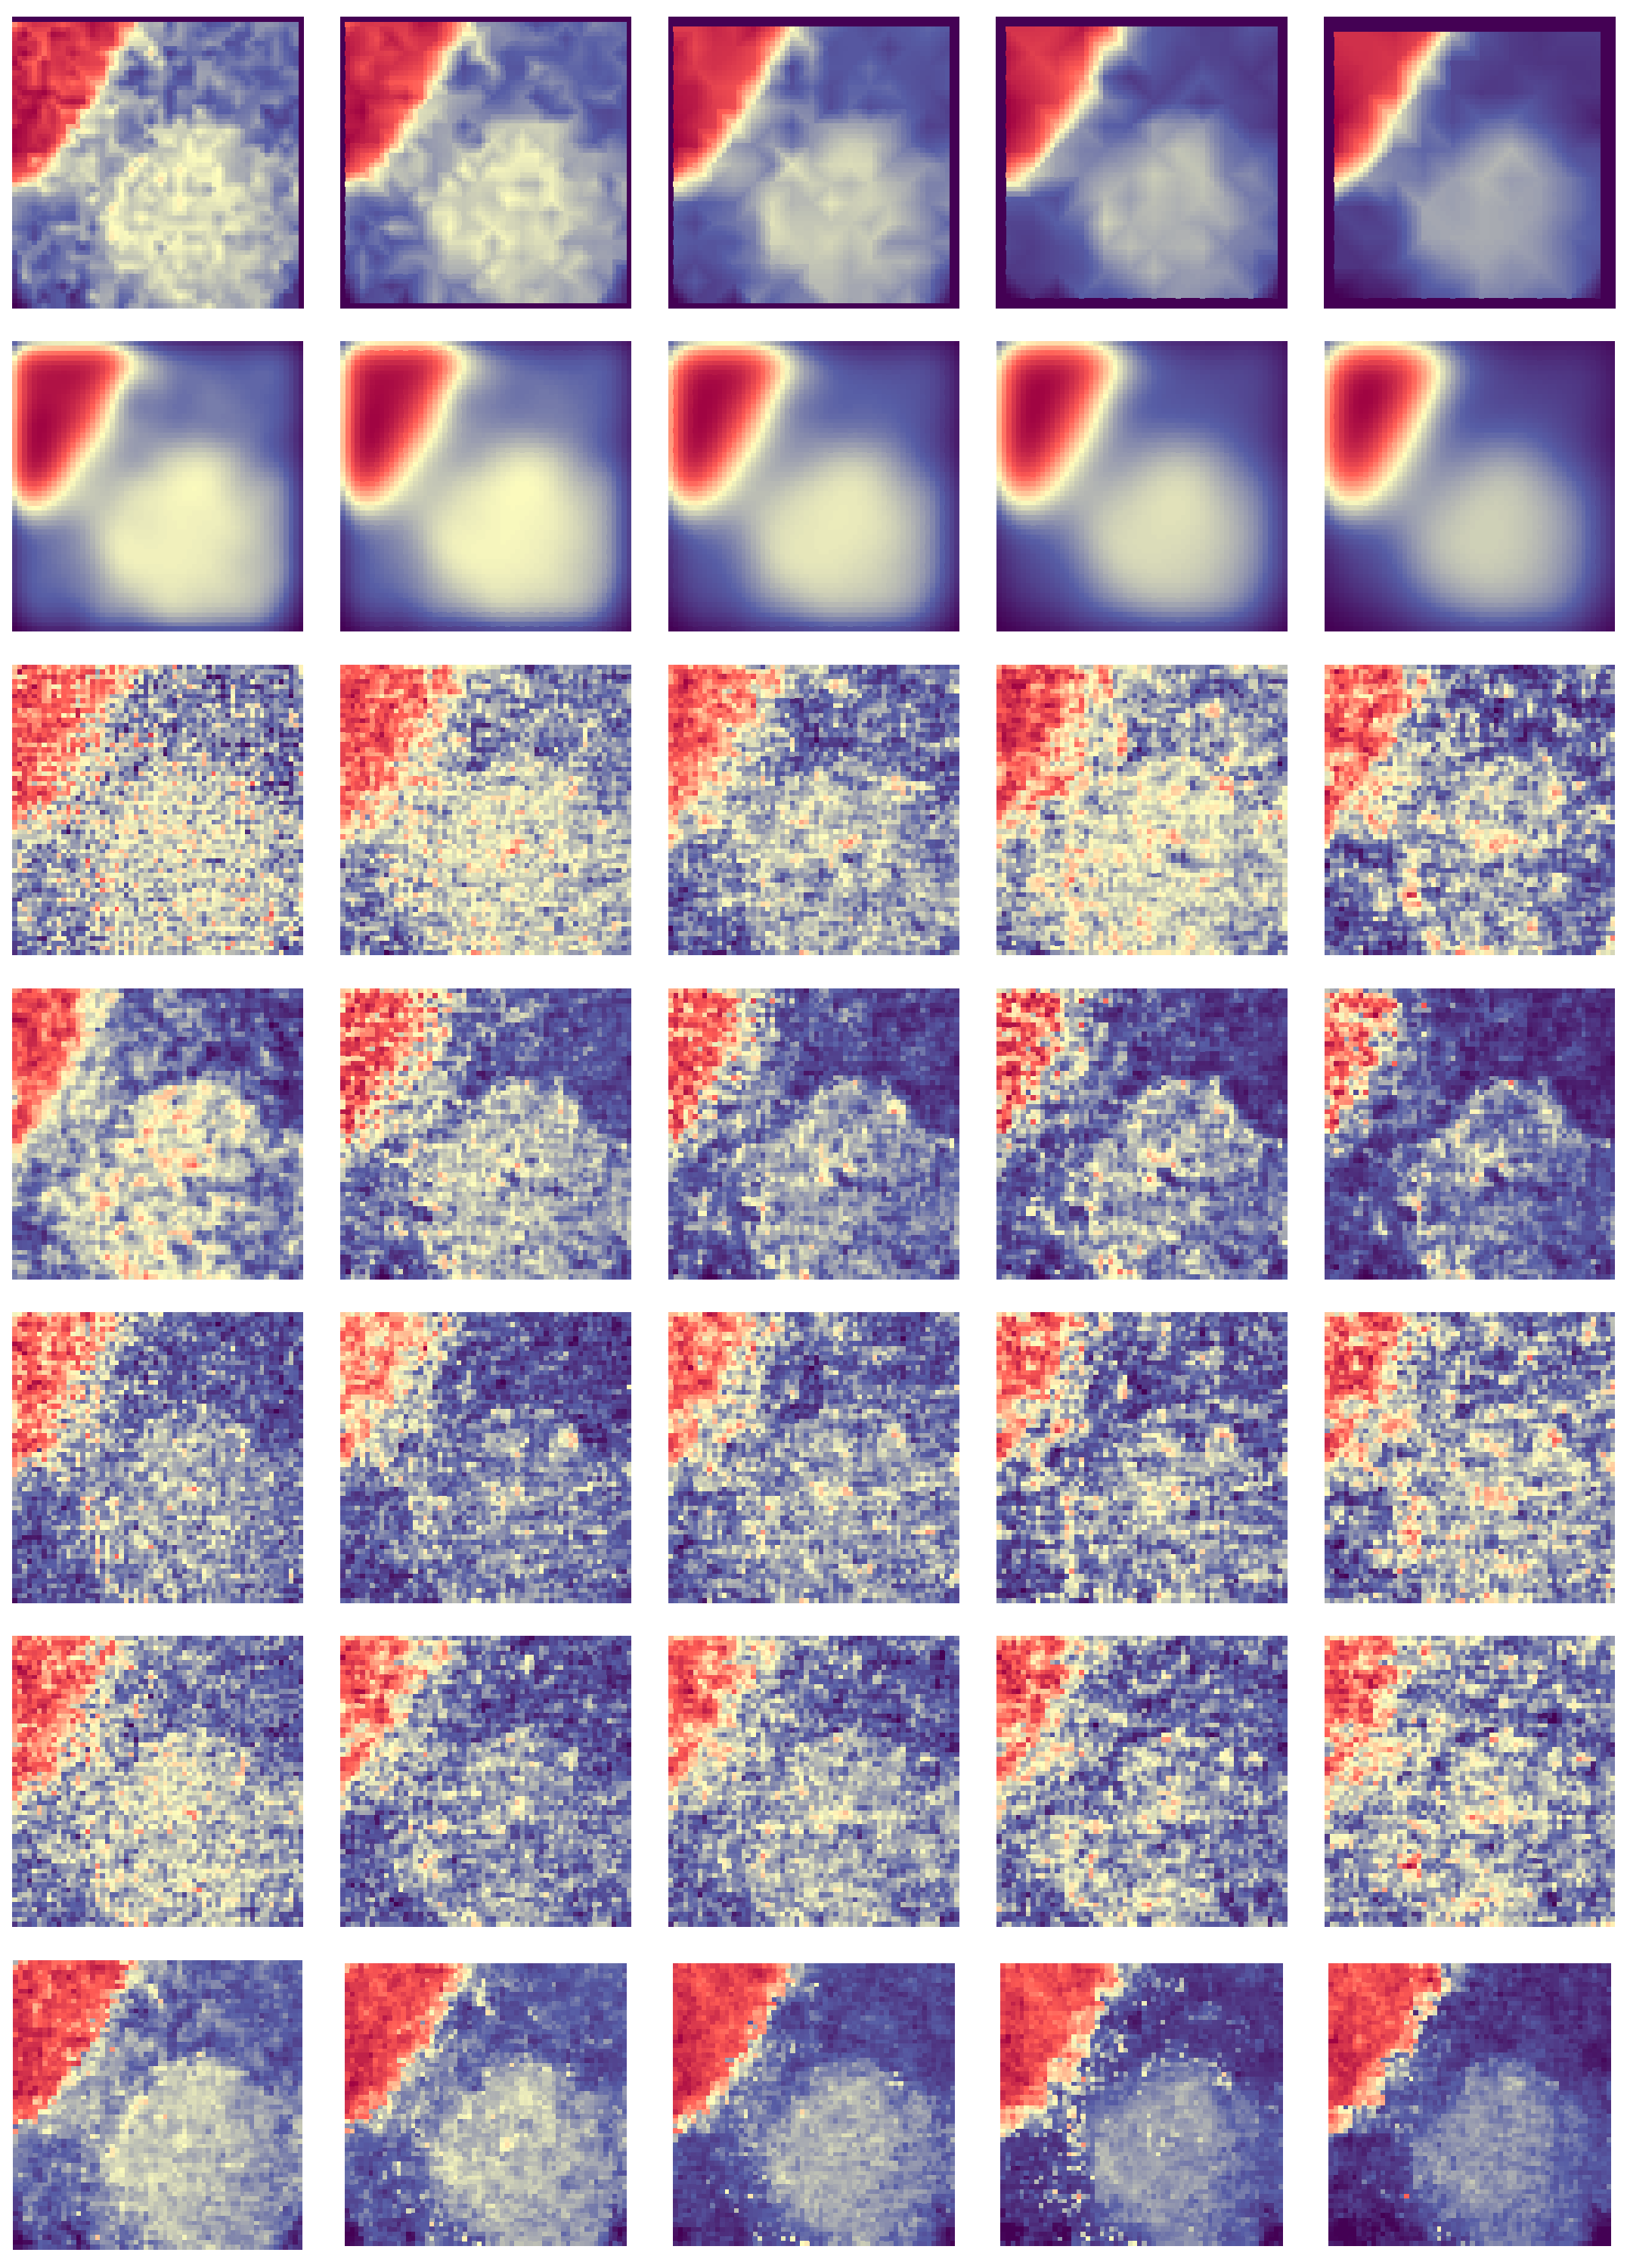

In [8]:
f, axs = plt.subplots(nrows=7, ncols=5, figsize=(30, 42))

size_ = 49
plt.axis("equal")
for i in range(len(data_name)):
    name = data_name[i]
    for s in scale_series:
        project_name = f'{folder_name}/norm/DNA/x{s}'
        position_r = pd.read_csv(f'result/{folder_name}/x{s}/reordered_position_with_center.csv')
        row_r = position_r['col']
        col_r = position_r['row']
        data_ours = pd.read_csv(f'result/{project_name}/{name}.csv')
        position_merge = pd.read_csv(f'result/{folder_name}/x{s}/colData_merge.csv')
        axs[i, s-2].axis("equal")
        axs[i, s-2].scatter(row_r, col_r, s=size_, marker='s', 
                         c=min_max_norm(data_ours['PC2'].values), cmap=cmp, linewidth=0)
        plt.tight_layout()
        axs[i, s-2].axis('off')

plt.savefig(f'../paper/NNfig/Fig4/PC2.png')
plt.show()

# Fig 4d | Evaluation of recovery accuracy in multi-scale resolution enhancement experiment

In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

def linear_normalize(array):
    array_n = array.copy()
    for i in range(array.shape[-1]):
        min_ = np.min(array[:, i])
        max_ = np.max(array[:, i])
        array_n[:, i] = (array[:, i] - min_) / (max_ - min_)
    return array_n

def linear_normalize_df(dataframe):
    """
    f: M -> M/normalize
    Args:
        dataframe: a pandas DataFrame, count matrix with dim of [cell, gene]
    Returns: linear normalized matrix
    """
    keys = dataframe.keys()
    array = dataframe.values
    new_array = linear_normalize(array)
    new_dataframe = pd.DataFrame(new_array, columns=keys)
    return new_dataframe

pearson_ = {}
for name in data_name:
    print(name)
    pearson_[name] = {}
    for g in ['PC1', 'PC2']:
        pearson_[name][g] = []
        for s in scale_series:
            data = pd.read_csv(f'result/{folder_name}/x{s}/reordered_count.csv')
            data_norm = linear_normalize_df(data)
            project_name = f'{folder_name}/norm/DNA/x{s}'
            data_compare = pd.read_csv(f'result/{project_name}/{name}.csv')

            pearson, _ = pearsonr(data_norm[g], data_compare[g])
            pearson_[name][g].append(pearson)
            
           
data_PC1 = {
    'scale':[2, 3, 4, 5, 6] * len(data_name),
    'value':[],
    'method':[],
}

for name in data_name:
    data_PC1['value'] += pearson_[name]['PC1']
    data_PC1['method'] += [name] * len(pearson_[name]['PC1'])

data_PC2 = {
    'scale':[2, 3, 4, 5, 6] * len(data_name),
    'value':[],
    'method':[],
}

for name in data_name:
    data_PC2['value'] += pearson_[name]['PC2']
    data_PC2['method'] += [name] * len(pearson_[name]['PC2'])
    
import numpy as np
import matplotlib.pyplot as plt

data_ = {
    'scale':[2, 3, 4, 5, 6] * len(data_name),
}

data_['value'] = [data_PC1['value'][i]/2 + data_PC2['value'][i]/2 for i in range(len(data_PC1['value']))]
data_['method'] = data_PC1['method']


color_list = [[194, 131, 105],
             [96, 154, 116], [171, 96, 103],
             [126, 120, 164], [220, 208, 209], [123, 123, 23],
             [194, 139, 182]]
color_x = [f'#{hex(i[0])[2:]}{hex(i[1])[2:]}{hex(i[2])[2:]}' for i in color_list]

interpolation_linear
gp_4
g2p_lrm
g2p_gp
g2p_mlp_128
joint_mlp_128
ours


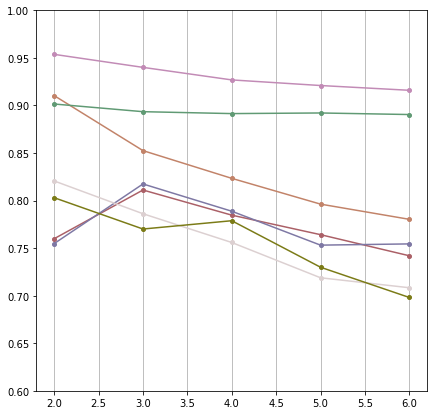

0.04766051303747551
0.028613034747313203


In [10]:
f, ax = plt.subplots(figsize=(7, 7))
for i in range(len(color_list)):
    x = data_['scale'][i*5:i*5+5]
    y = data_['value'][i*5:i*5+5]
    ax.plot(x, y, 'o', ls='-', ms=4, color=color_x[i])
ax.set(ylim=(0.6, 1))
ax.xaxis.grid(True)
plt.savefig(f'../paper/NNfig/Fig4/pearson.pdf')
plt.show()

linear1 = data_['value'][0]
ours1 = data_['value'][-5]

gp5 = data_['value'][9]
ours5 = data_['value'][-1]

print ((ours1-linear1)/linear1)
print ((ours5-gp5)/gp5)

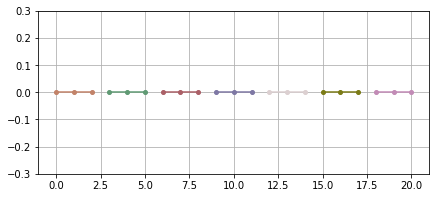

In [11]:
f, ax = plt.subplots(figsize=(7, 3))
for i in range(len(color_list)):
    x = np.array([0, 1, 2]) + i*3
    y = np.array([0, 0, 0])
    ax.plot(x, y, 'o', ls='-', ms=4, color=color_x[i])
ax.set(ylim=(-0.3, 0.3))
ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.savefig(f'../paper/NNfig/Fig4/color_bar.pdf')
plt.show()

interpolation_linear
2 0.008164258889071453
3 0.013890380628755444
4 0.019848241847406134
5 0.028659582886750714
6 0.03542464586997932
gp_4
2 0.15526231484175312
3 0.17741368853127462
4 0.18747161669613932
5 0.19300443563908828
6 0.19615040906107944
g2p_lrm
2 0.023299499522358803
3 0.018091385748308923
4 0.023343803737424857
5 0.029245967438602832
6 0.031078428332185812
g2p_gp
2 0.016827827462490626
3 0.01395307935397747
4 0.01857843844184618
5 0.026236839763456685
6 0.03198225783760063
g2p_mlp_128
2 0.014628432363555155
3 0.01762956920470899
4 0.022587696231062063
5 0.027559233289980674
6 0.032220350343720526
joint_mlp_128
2 0.015940031383975234
3 0.018206007332455525
4 0.0206646409608017
5 0.026930533351673537
6 0.03158382377989036
ours
2 0.005437389609637217
3 0.007085945145829
4 0.01015235438980506
5 0.015487822398189154
6 0.019521621592321514


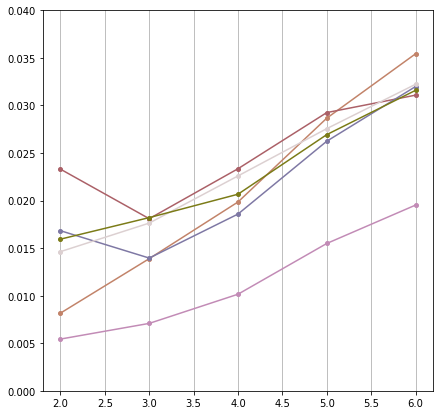

In [12]:
from sklearn.metrics import mean_squared_error as mse

mse_ = {}
for name in data_name:
    print(name)
    mse_[name] = []
    for s in scale_series:
        data = pd.read_csv(f'result/{folder_name}/x{s}/reordered_count.csv')
        data_norm = linear_normalize_df(data)
        project_name = f'{folder_name}/norm/DNA/x{s}'
        data_compare = pd.read_csv(f'result/{project_name}/{name}.csv')

        mse_score = mse(data_norm[['PC1', 'PC2']].values.reshape(-1, 2),
                        data_compare[['PC1', 'PC2']].values.reshape(-1, 2))
        print(s, mse_score)
        mse_[name].append(mse_score)
            
            
data_['mse'] = []
for name in data_name:
    data_['mse'] += mse_[name]


f, ax = plt.subplots(figsize=(7, 7))
for i in range(len(color_list)):
    x = data_['scale'][i*5:i*5+5]
    y = data_['mse'][i*5:i*5+5]
    ax.plot(x, y, 'o', ls='-', ms=4, color=color_x[i])
ax.set(ylim=(0., 0.04))
ax.xaxis.grid(True)
plt.savefig(f'../paper/NNfig/Fig4/mse_3.pdf')
plt.show()

In [13]:
l1 = data_['mse'][0]
j5 = data_['mse'][-6]
ours1 = data_['mse'][-5]
ours5 = data_['mse'][-1]

print ((ours1-l1)/l1)
print ((ours5-j5)/j5)

-0.3340008341828037
-0.38191076139580454


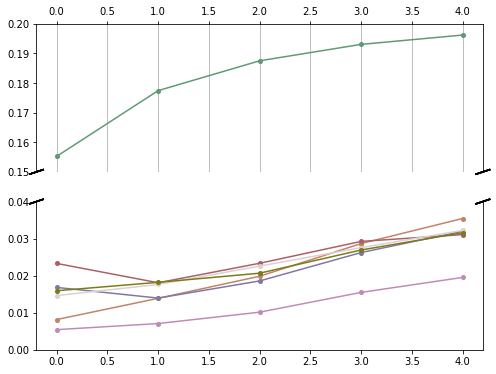

In [14]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 1]}, figsize=(8, 6))
# plot the same data on both axes
for i in range(len(color_list)):
    
    x = [i for i in range(5)]
    y = data_['mse'][i*5:i*5+5]

    ax.plot(x, y, 'o', ls='-', ms=4, color=color_x[i])
    ax2.plot(x, y, 'o', ls='-', ms=4, color=color_x[i])

    # zoom-in / limit the view to different portions of the data
    ax.set_ylim(0.15, 0.20)  # outliers only
    ax2.set_ylim(0.00, 0.04)  # most of the data

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop='off')  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.xaxis.grid(True)
plt.savefig(f'../paper/NNfig/Fig4/mse_3.pdf')
plt.show()


In [15]:
data_frame = pd.DataFrame(data_, index=None)

# Fig 4e | Evaluation of tissue structure 

In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, fowlkes_mallows_score
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

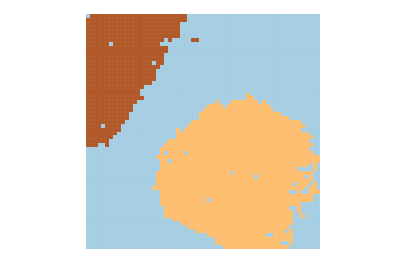

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)


data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

size = 9
f, ax = plt.subplots()
plt.axis("equal")
ax.scatter(row, col, s=size, marker='s',
           c=kmeans.fit(data[['PC1', 'PC2']].values.reshape(-1, 2)).labels_,
           cmap='Paired')
plt.tight_layout()
ax.axis('off')
plt.savefig(f'../paper/NNfig/Fig4/cluster.pdf')
plt.show()

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score as ari
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
ari_ = {}

genes = ['PC1', 'PC2']
data_['ari_4_all'] = []
for name in data_name:
    print(name)
    ari_[name] = []
    for s in scale_series:
        data = pd.read_csv(f'result/{folder_name}/x{s}/reordered_count.csv')
        data_norm = linear_normalize_df(data)
        project_name = f'{folder_name}/norm/DNA/x{s}'
        data_compare = pd.read_csv(f'result/{project_name}/{name}.csv')

        ari_score = ari(kmeans.fit(data_norm[genes].values.reshape(-1, 2)).labels_,
                              kmeans.fit(data_compare[genes].values.reshape(-1, 2)).labels_)
        ari_[name].append(ari_score)
    data_['ari_4_all'] += ari_[name]

interpolation_linear
gp_4
g2p_lrm
g2p_gp
g2p_mlp_128
joint_mlp_128
ours


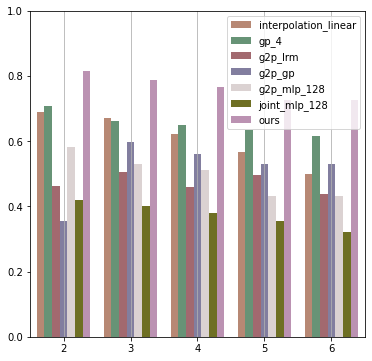

In [19]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x="scale", y="ari_4_all", data=data_, hue='method',
            palette=color_x)
ax.set(ylim=(0, 1))
ax.xaxis.grid(True)
plt.savefig(f'../paper/NNfig/Fig4/ari_bar_all_4.pdf')
plt.show()

In [20]:
spatial = data_['ari_4_all'][5:10]
ours = data_['ari_4_all'][-5:]

for i in [0, 4]:
    print ((ours[i]-spatial[i])/spatial[i])

0.15435795261966886
0.17853105404512912


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import jaccard_score as iou

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
ari_ = {}
data_['ari_3_all'] = []
genes = ['PC1', 'PC2']
for name in data_name:
    print(name)
    ari_[name] = []
    
    for s in scale_series:
        data = pd.read_csv(f'result/{folder_name}/x{s}/reordered_count.csv')
        data_norm = linear_normalize_df(data)
        original_label = kmeans.fit(data_norm[genes].values.reshape(-1, 2)).labels_
        
        project_name = f'{folder_name}/norm/DNA/x{s}'
        data_compare = pd.read_csv(f'result/{project_name}/{name}.csv')
        my_label = kmeans.fit(data_compare[genes].values.reshape(-1, 2)).labels_
        ari_score = ari(original_label, my_label)
        ari_[name].append(ari_score)
    data_['ari_3_all'] += ari_[name]

interpolation_linear
gp_4
g2p_lrm
g2p_gp
g2p_mlp_128
joint_mlp_128
ours


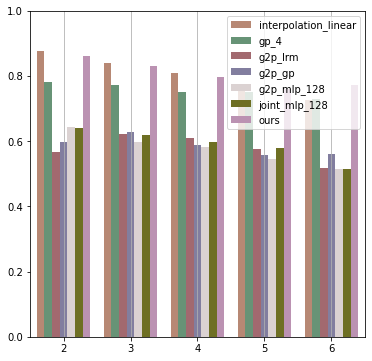

In [22]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x="scale", y="ari_3_all", data=data_, hue='method',
            palette=color_x)
ax.set(ylim=(0, 1))
ax.xaxis.grid(True)
plt.savefig(f'../paper/NNfig/Fig4/ari_bar_all_3.pdf')
plt.show()

In [23]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import adjusted_rand_score as ari


def map_label(original_label, my_label):
    original_label_class_num = len(np.unique(original_label))
    my_label_class_num = len(np.unique(my_label))

    c_mat = np.zeros((original_label_class_num, my_label_class_num))
    for i in range(original_label_class_num):
        for j in range(my_label_class_num):
            c_mat[i, j] = ari((original_label==i).reshape(-1), (my_label==j).reshape(-1))

    goodAt = c_mat
    weakAt = np.max(c_mat) + 1 -goodAt
    row_ind,col_ind=linear_sum_assignment(weakAt)

    class_map = {}
    for i in range(len(row_ind)):
        class_map[col_ind[i]] = row_ind[i]

    return np.array([class_map[l] for l in my_label.tolist()])

# Supp Fig 6 | Tissue structure and substructure

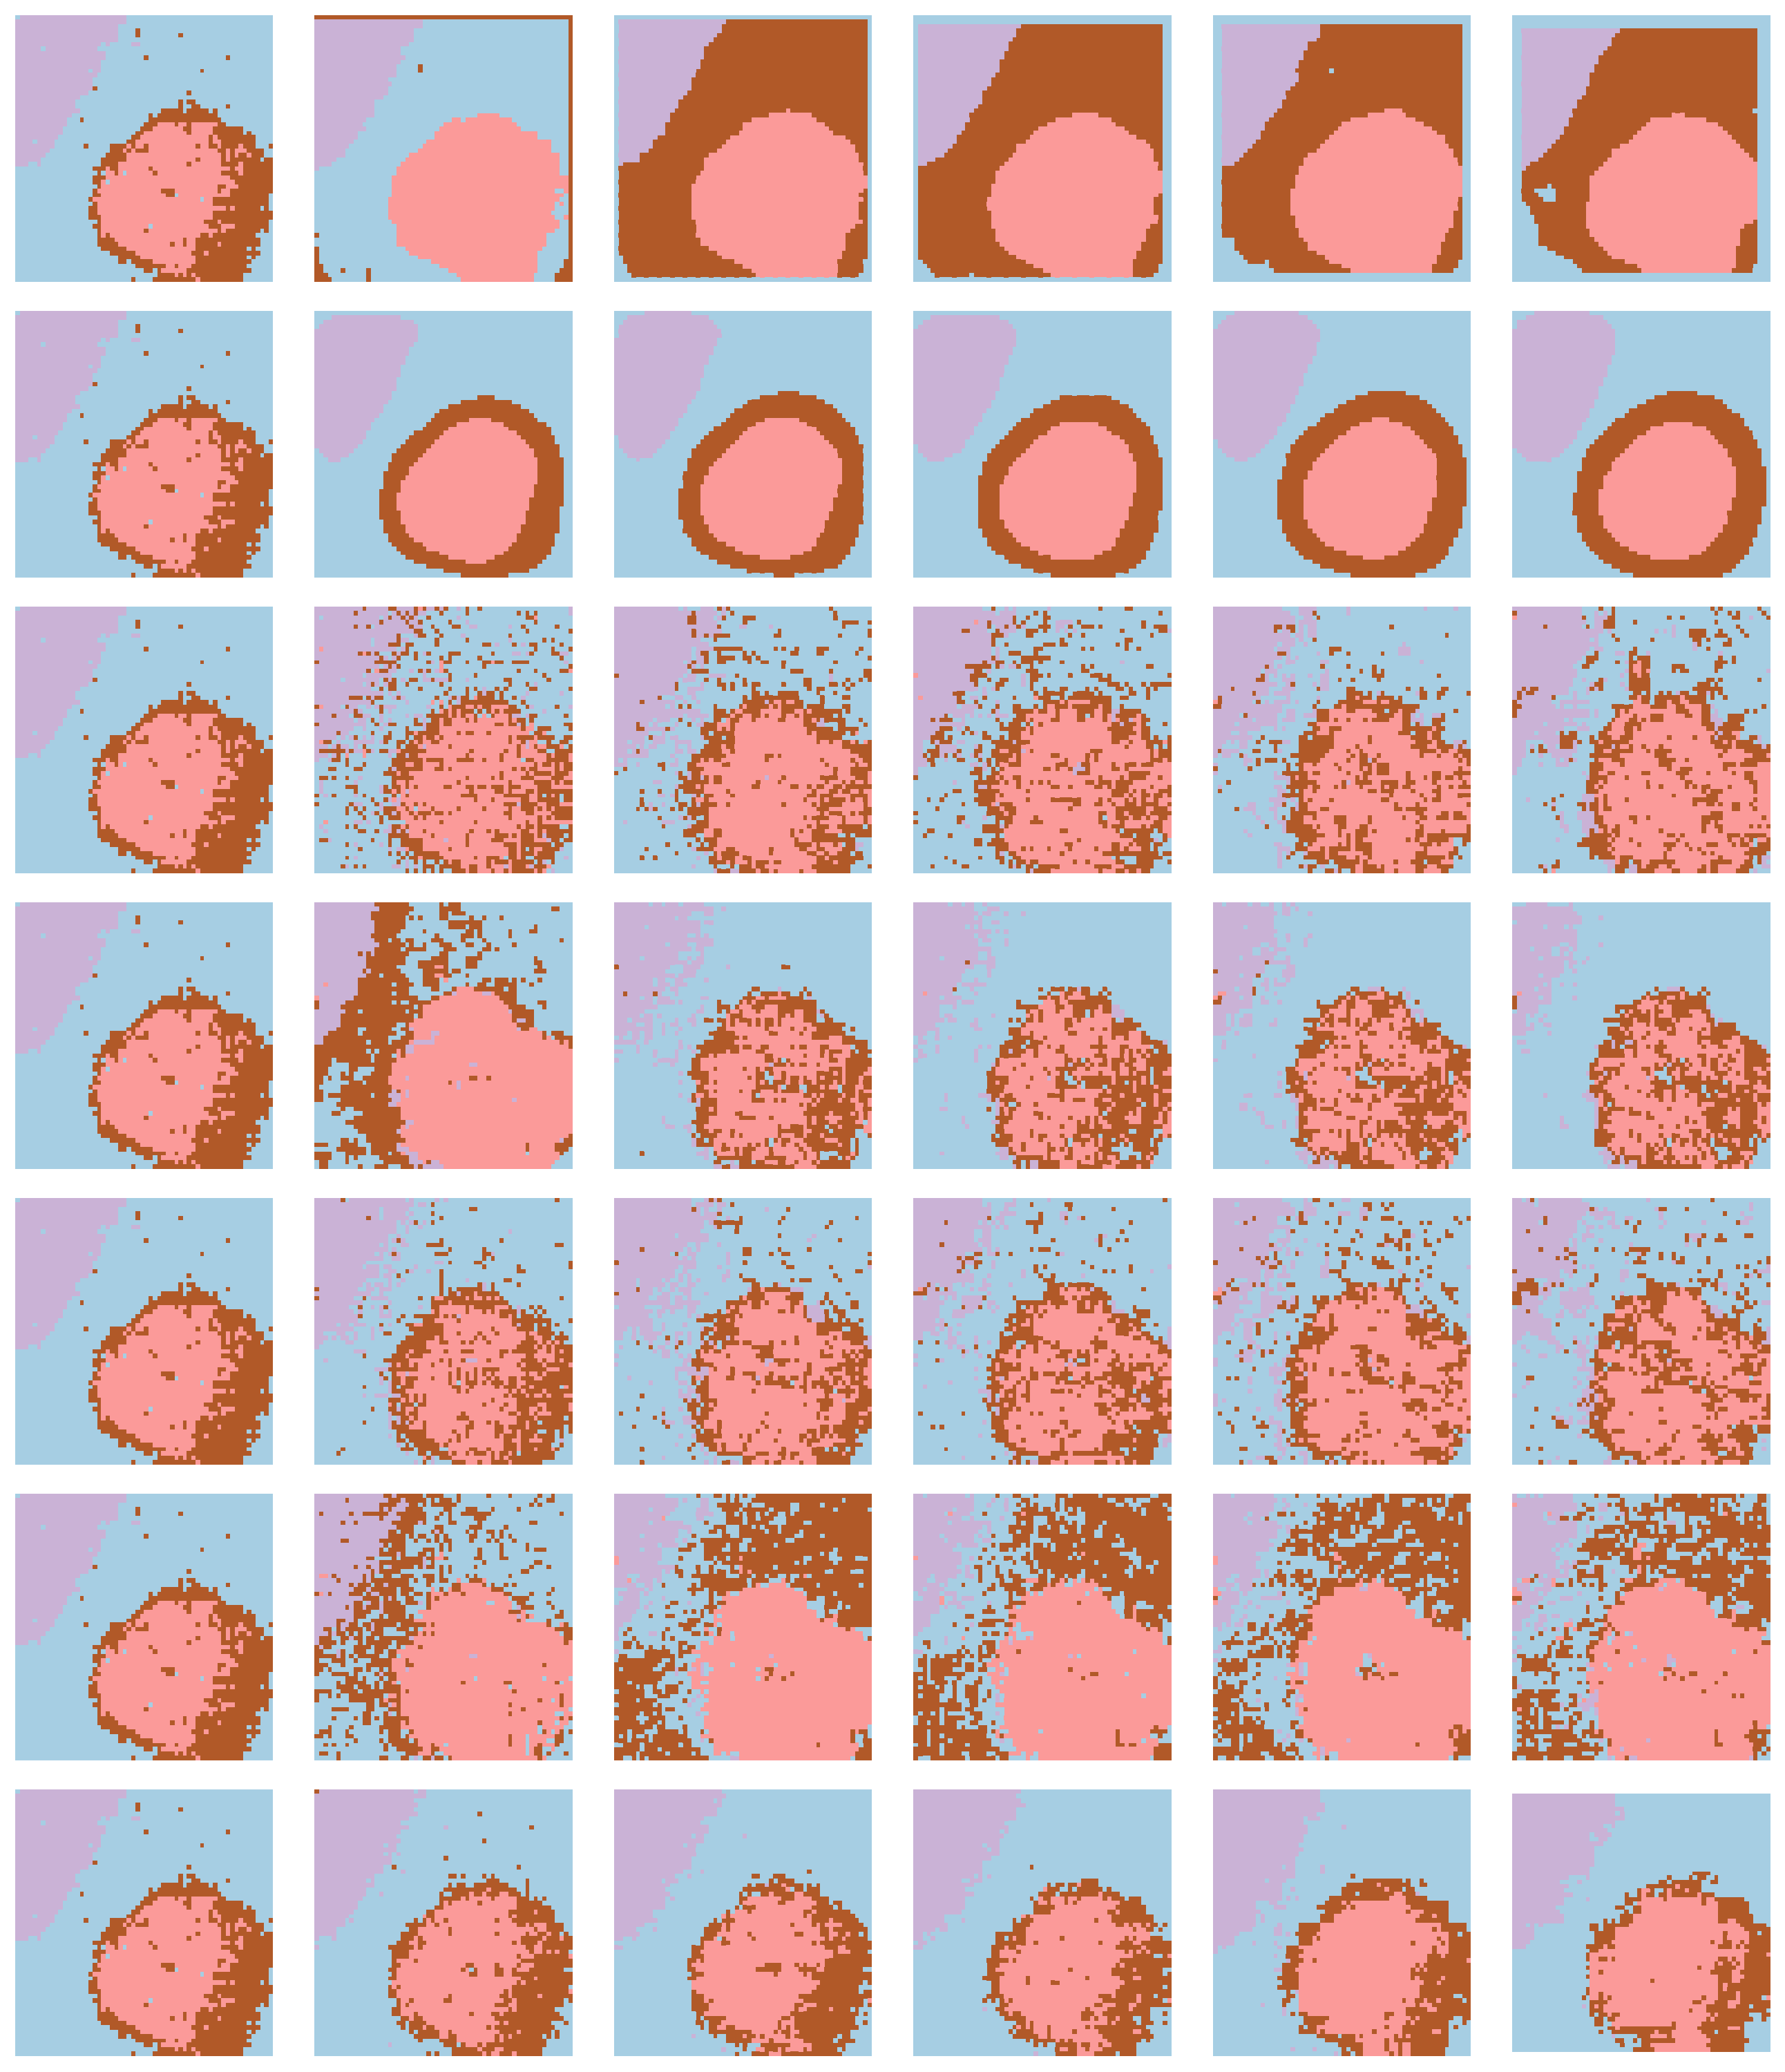

In [24]:
f, axs = plt.subplots(nrows=7, ncols=6, figsize=(36, 42))

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
data_norm = linear_normalize_df(data)
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

size_ = 49
plt.axis("equal")
original_label = kmeans.fit(data_norm[genes].values.reshape(-1, len(genes))).labels_
for i in range(len(data_name)):
    axs[i, 0].scatter(row, col, s=size_, marker='s', c=original_label, cmap='Paired', linewidth=0)
    plt.tight_layout()
    axs[i, 0].axis('off')


plt.axis("equal")
for i in range(len(data_name)):
    name = data_name[i]
    for s in scale_series:
        project_name = f'{folder_name}/norm/DNA/x{s}'
        position_r = pd.read_csv(f'result/{folder_name}/x{s}/reordered_position_with_center.csv')
        row_r = position_r['col']
        col_r = position_r['row']
        data_ours = pd.read_csv(f'result/{project_name}/{name}.csv')
        position_merge = pd.read_csv(f'result/{folder_name}/x{s}/colData_merge.csv')
        plt.axis("equal")
        my_label = kmeans.fit(data_ours[genes].values.reshape(-1, len(genes))).labels_
        mapped_label = map_label(original_label, my_label)
        axs[i, s-1].scatter(row_r, col_r, s=size_, marker='s', 
                         c=mapped_label, cmap='Paired', linewidth=0)
        plt.tight_layout()
        axs[i, s-1].axis('off')

plt.savefig(f'../paper/NNfig/Fig4/supp/cluster_all_4.png')
plt.show()

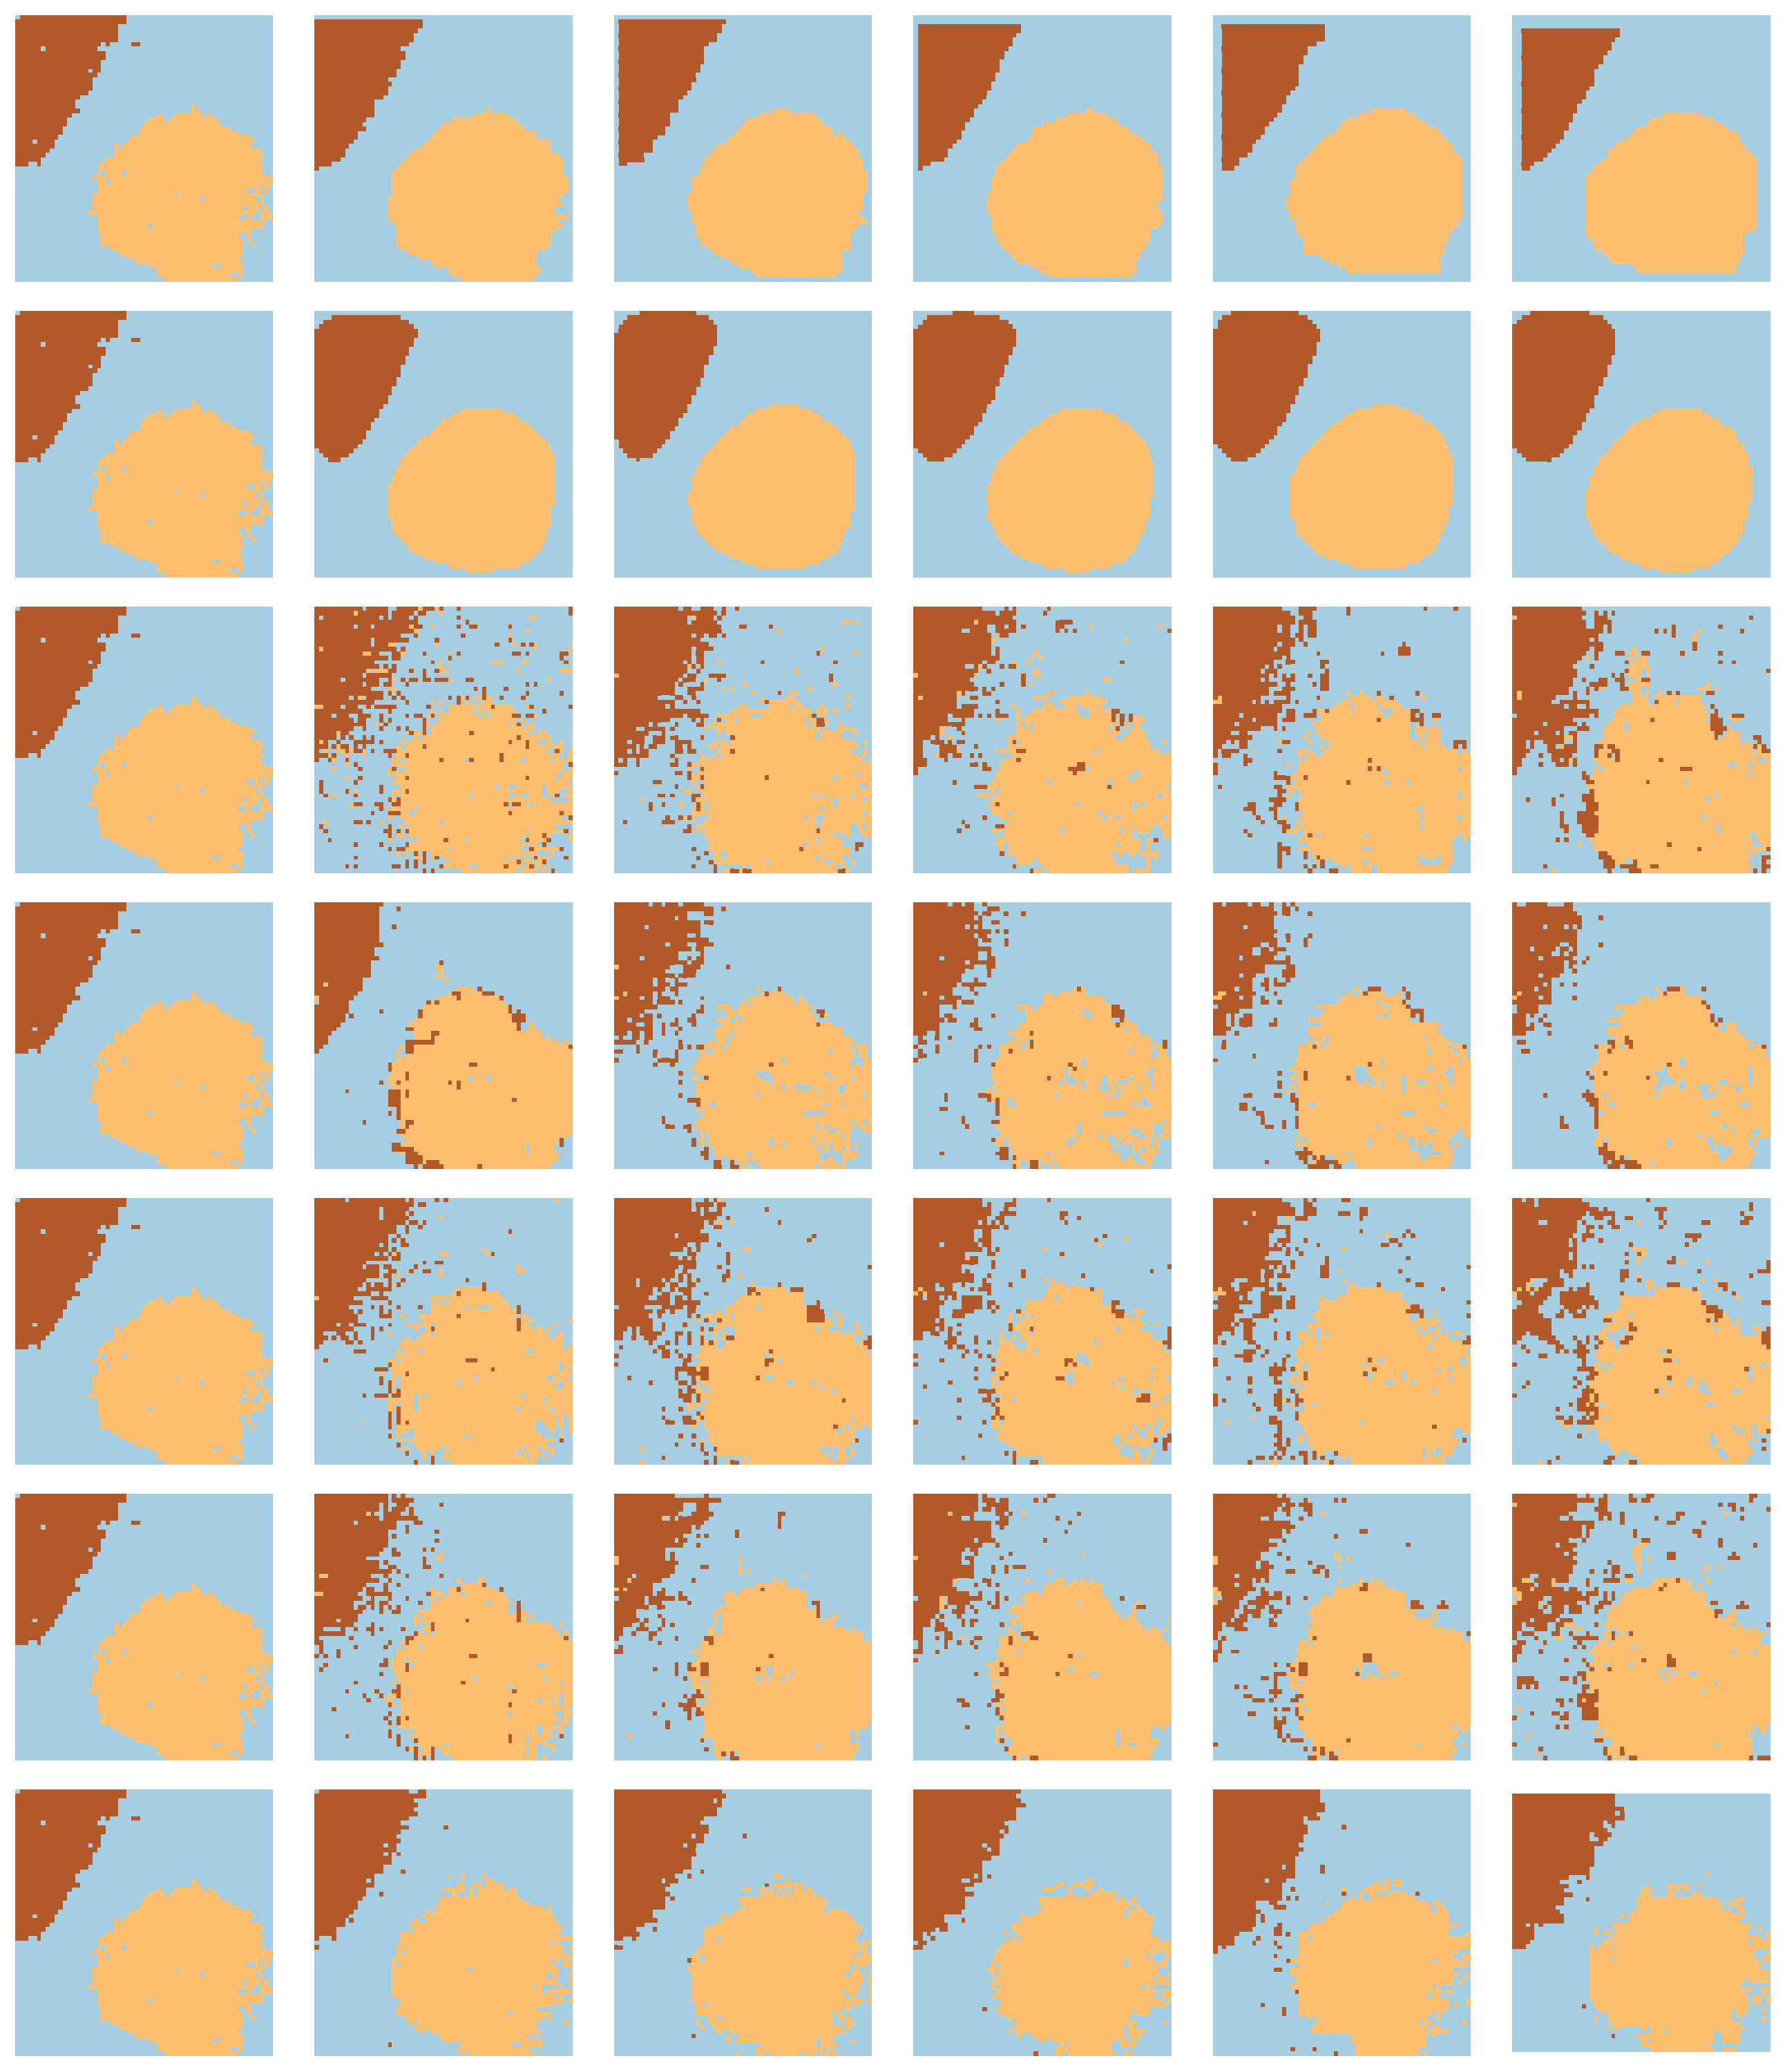

In [25]:
f, axs = plt.subplots(nrows=7, ncols=6, figsize=(36, 42))

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
data_norm = linear_normalize_df(data)
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

size_ = 49
plt.axis("equal")
original_label = kmeans.fit(data_norm[genes].values.reshape(-1, len(genes))).labels_
for i in range(len(data_name)):
    axs[i, 0].scatter(row, col, s=size_, marker='s', c=original_label, cmap='Paired', linewidth=0)
    plt.tight_layout()
    axs[i, 0].axis('off')


plt.axis("equal")
for i in range(len(data_name)):
    name = data_name[i]
    for s in scale_series:
        project_name = f'{folder_name}/norm/DNA/x{s}'
        position_r = pd.read_csv(f'result/{folder_name}/x{s}/reordered_position_with_center.csv')
        row_r = position_r['col']
        col_r = position_r['row']
        data_ours = pd.read_csv(f'result/{project_name}/{name}.csv')
        position_merge = pd.read_csv(f'result/{folder_name}/x{s}/colData_merge.csv')
        plt.axis("equal")
        my_label = kmeans.fit(data_ours[genes].values.reshape(-1, len(genes))).labels_
        mapped_label = map_label(original_label, my_label)
        axs[i, s-1].scatter(row_r, col_r, s=size_, marker='s', 
                         c=mapped_label, cmap='Paired', linewidth=0)
        plt.tight_layout()
        axs[i, s-1].axis('off')

plt.savefig(f'../paper/NNfig/Fig4/supp/cluster_all_3.png')
plt.show()